In [3]:
# N.SURYA TEJESWAR REDDY      ROLLNO. CSE23127

In [15]:
# DV CASE STUDY TOPIC : VISUALISING POPULARITY AND QUALITY IN MOBILE GAMING APPS

In [16]:
# DATA SETS :
#    googleplaystore_games.csv
#    android-games.csv

In [12]:
import pandas as pd
df1 = pd.read_csv('C:/Users/prana/Videos/googleplaystore_games.csv')
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Last Updated'],
      dtype='object')

In [13]:
import pandas as pd
df2 = pd.read_csv('C:/Users/prana/Videos/android-games.csv')
df2.columns

Index(['rank', 'title', 'total ratings', 'installs', 'average rating',
       'growth (30 days)', 'growth (60 days)', 'price', 'category',
       '5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings',
       '1 star ratings', 'paid'],
      dtype='object')

In [ ]:
# Question 1: Which game genres (Action, Puzzle, etc.) have the most downloads?

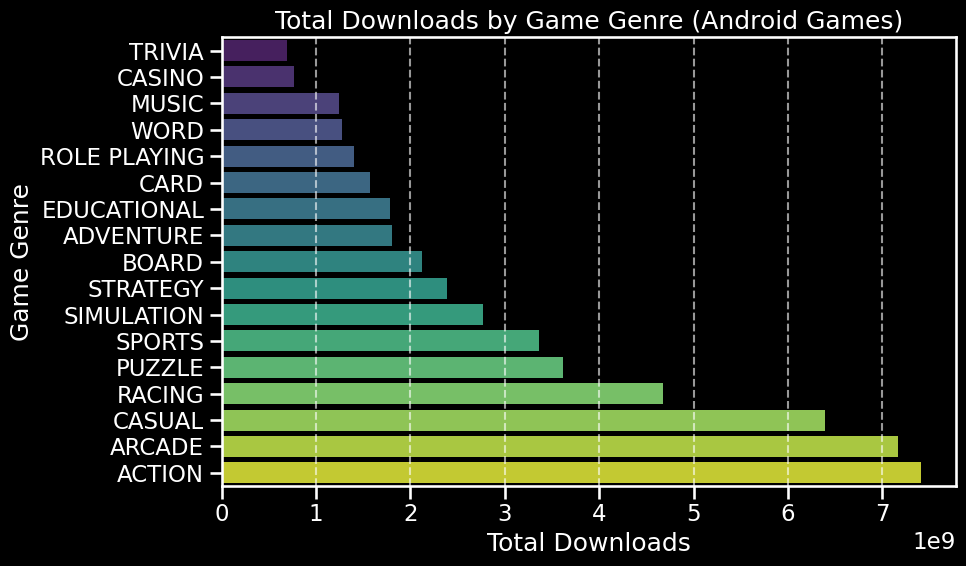

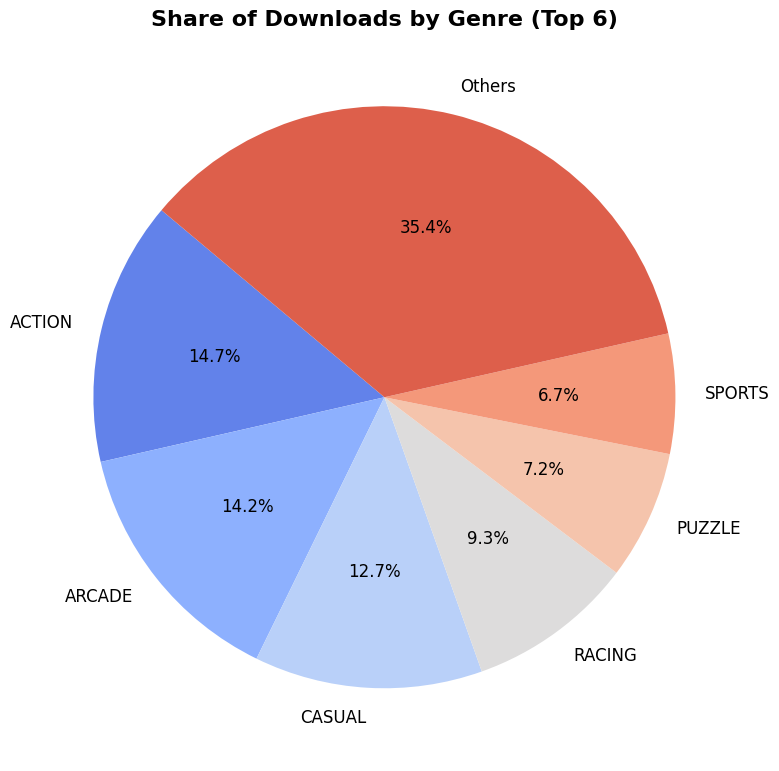

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_android = pd.read_csv('C:/Users/nstr9/OneDrive/Desktop/android-games.csv')

def convert_installs(val):
    val = str(val).strip()
    if 'M' in val:
        return float(val.replace('M', '')) * 1_000_000
    elif 'k' in val or 'K' in val:
        return float(val.replace('k', '').replace('K', '')) * 1_000
    else:
        try:
            return float(val)
        except:
            return np.nan

df_android['installs_clean'] = df_android['installs'].apply(convert_installs)
df_android['genre'] = df_android['category'].str.replace('GAME ', '', regex=False)

genre_downloads = df_android.groupby('genre')['installs_clean'].sum().sort_values(ascending=True)

# Horizontal Bar Chart
with plt.style.context('dark_background'):
    sns.set_context("talk")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=genre_downloads.values, y=genre_downloads.index, hue=genre_downloads.index, palette='viridis', dodge=False)

    plt.xlabel('Total Downloads')
    plt.ylabel('Game Genre')
    plt.title('Total Downloads by Game Genre (Android Games)')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Pie Chart
genre_downloads_sorted = genre_downloads.sort_values(ascending=False)
top6 = genre_downloads_sorted.head(6)
others = genre_downloads_sorted.iloc[6:].sum()
top6['Others'] = others

# Pie chart with white background and black text
fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')
colors = sns.color_palette("coolwarm", len(top6))

wedges, texts, autotexts = ax.pie(
    top6,
    labels=top6.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'color': 'black', 'fontsize': 12}
)

ax.set_title('Share of Downloads by Genre (Top 6)', fontsize=16, color='black', weight='bold')
plt.tight_layout()
plt.show()


In [3]:
# Question 2: What words appear most often in game names?

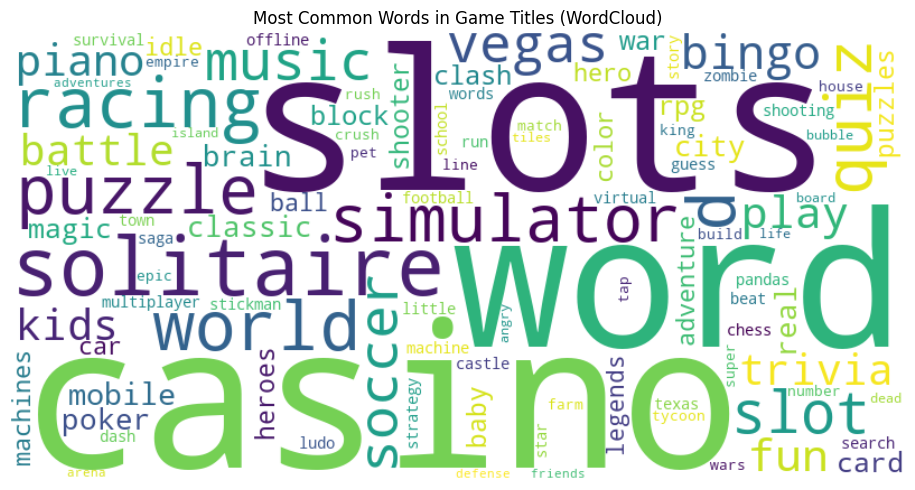

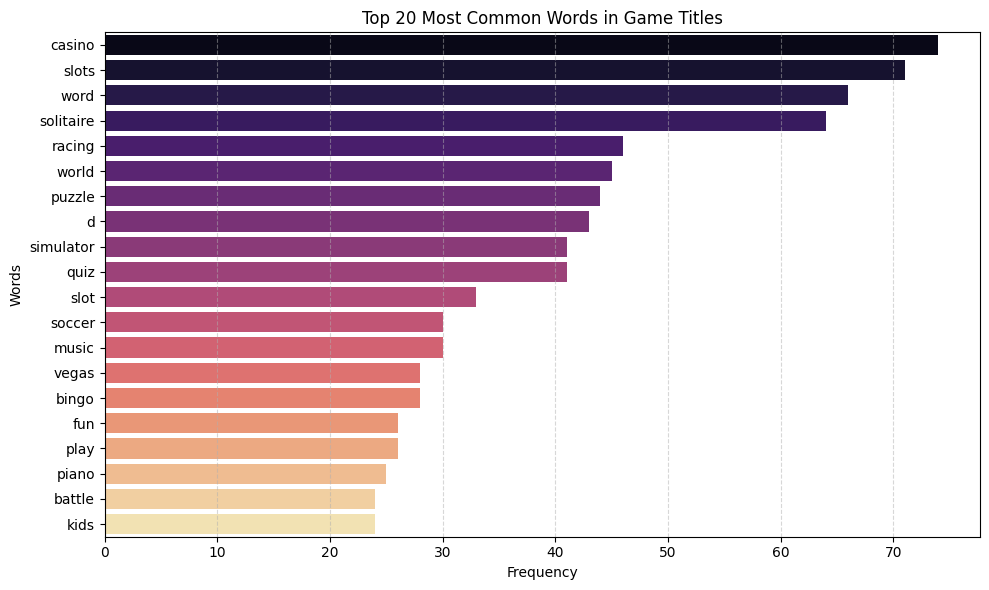

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from collections import Counter
import re
# Load the dataset
df = pd.read_csv('C:/Users/nstr9/OneDrive/Desktop/android-games.csv')

# Extract game names
titles = df['title'].dropna().astype(str).str.lower()

# Clean and tokenize titles
def clean_text(text):
    text = re.sub(r'[^a-zA-Z ]', '', text)  # Remove punctuation/numbers
    return text.split()

all_words = []
for title in titles:
    all_words.extend(clean_text(title))

# Remove common stopwords
stopwords = set(STOPWORDS)
custom_stopwords = stopwords.union({'game', 'free', 'games', 'new', 'hd', '2023', '2024', 'online'})  # Add custom irrelevant words
filtered_words = [word for word in all_words if word not in custom_stopwords]

# Count word frequencies
word_counts = Counter(filtered_words)

# --- 1. WordCloud ---
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', stopwords=custom_stopwords,
                      max_words=100).generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Game Titles (WordCloud)')
plt.tight_layout()
plt.show()

# --- 2. Bar Plot of Top 20 Words ---
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words),hue=list(words),palette='magma')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words in Game Titles')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [5]:
# QN 3 How do average downloads & ratings differ across genres?

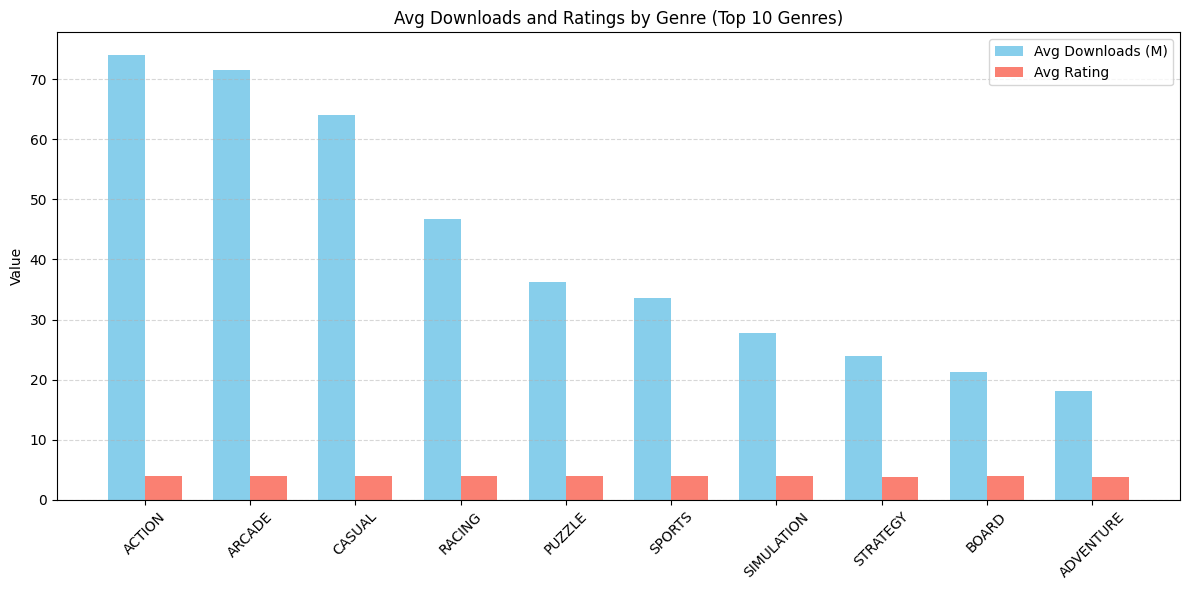

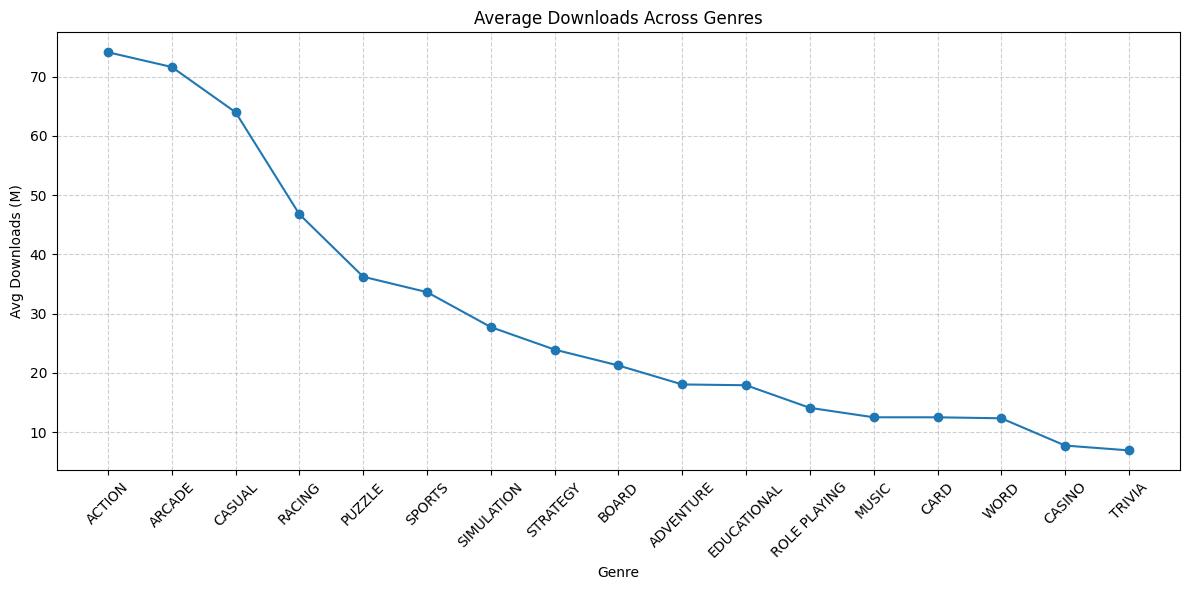

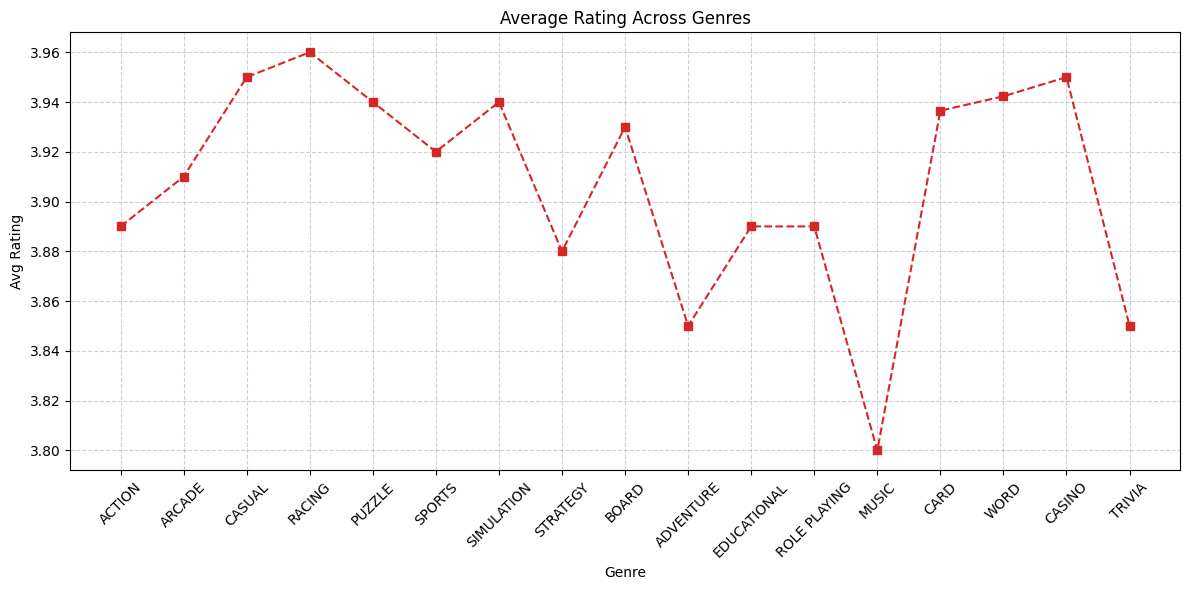

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Data Preparation (No Changes Here) ---
df = pd.read_csv('android-games.csv')
df['genre'] = df['category'].str.replace('GAME ', '', regex=False)
df['rating'] = pd.to_numeric(df['average rating'], errors='coerce')

def convert_installs(val):
    val = str(val).strip()
    if 'M' in val:
        return float(val.replace('M', '')) * 1_000_000
    elif 'k' in val or 'K' in val:
        return float(val.replace('k', '').replace('K', '')) * 1_000
    else:
        try:
            return float(val)
        except:
            return np.nan

df['installs_clean'] = df['installs'].apply(convert_installs)
df_clean = df[['genre', 'rating', 'installs_clean']].dropna()
genre_stats = df_clean.groupby('genre').agg({
    'installs_clean': 'mean',
    'rating': 'mean'
}).sort_values(by='installs_clean', ascending=False)
genre_stats['installs_millions'] = genre_stats['installs_clean'] / 1_000_000

# --- 1. Grouped Bar Plot (No Changes Here) ---
plt.figure(figsize=(12, 6))
genre_stats_plot = genre_stats.head(10)  # Top 10 genres by downloads
x = np.arange(len(genre_stats_plot))
width = 0.35
plt.bar(x - width/2, genre_stats_plot['installs_millions'], width, label='Avg Downloads (M)', color='skyblue')
plt.bar(x + width/2, genre_stats_plot['rating'], width, label='Avg Rating', color='salmon')
plt.xticks(x, genre_stats_plot.index, rotation=45)
plt.ylabel('Value')
plt.title('Avg Downloads and Ratings by Genre (Top 10 Genres)')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# --- 2. Two Separate Line Plots (MODIFIED SECTION) ---

# Graph 1: Average Downloads Across Genres
plt.figure(figsize=(12, 6))
plt.plot(genre_stats.index, genre_stats['installs_millions'], marker='o', color='tab:blue')
plt.title('Average Downloads Across Genres')
plt.xlabel('Genre')
plt.ylabel('Avg Downloads (M)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Graph 2: Average Ratings Across Genres
plt.figure(figsize=(12, 6))
plt.plot(genre_stats.index, genre_stats['rating'], marker='s', linestyle='--', color='tab:red')
plt.title('Average Rating Across Genres')
plt.xlabel('Genre')
plt.ylabel('Avg Rating')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [7]:
# QN4 How do average downloads & ratings differ across genres? (Using both datasets)

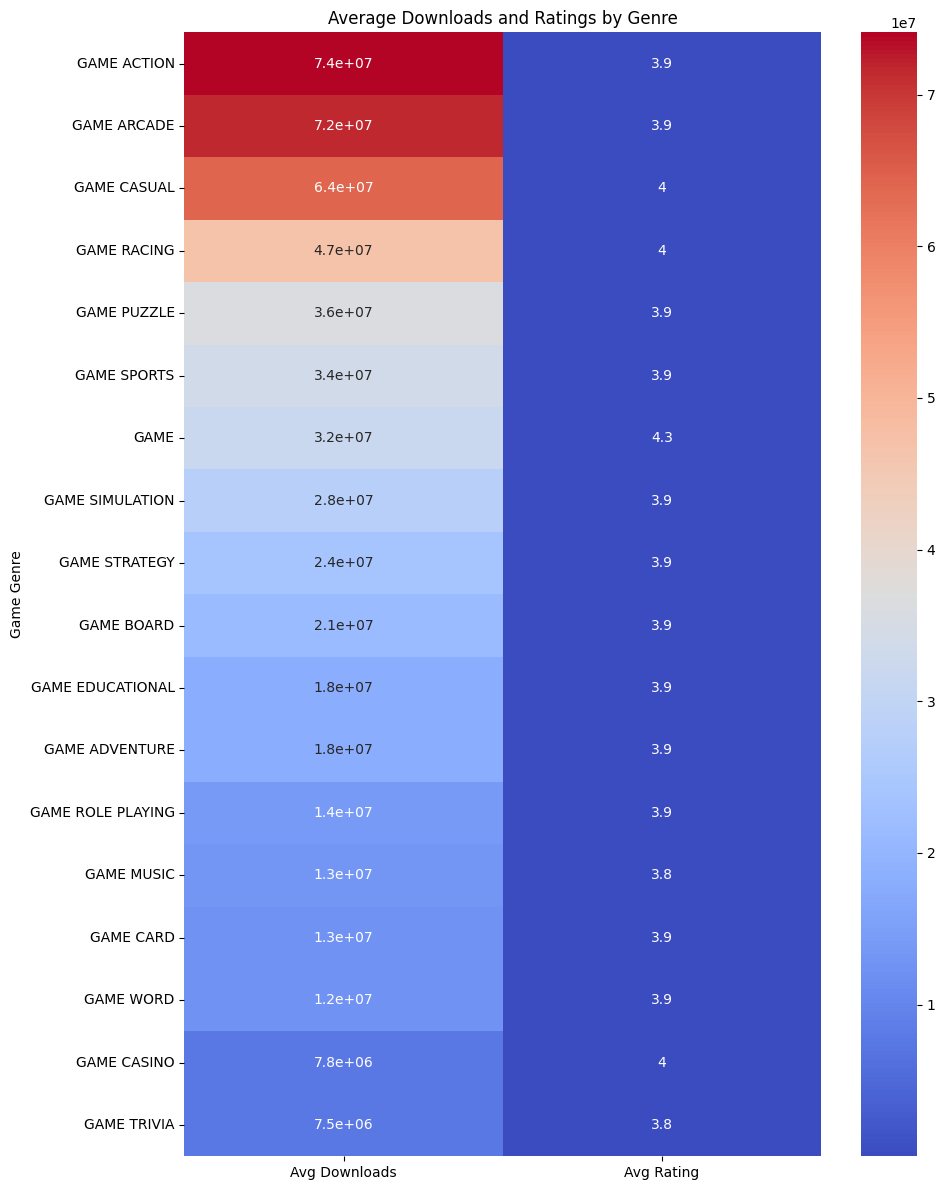

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('/home/surya/Downloads/android-games.csv')
df2 = pd.read_csv('/home/surya/Downloads/googleplaystore_games.csv')
df1_clean = df1[['category', 'average rating', 'installs']].dropna()

def convert_installs(x):
    x = str(x).replace(',', '').replace('+', '').strip()
    if 'M' in x:
        return float(x.replace('M', '')) * 1e6
    elif 'B' in x:
        return float(x.replace('B', '')) * 1e9
    else:
        try:
            return float(x)
        except:
            return np.nan

df1_clean['installs'] = df1_clean['installs'].apply(convert_installs)
df1_clean = df1_clean.dropna(subset=['installs'])

df1_grouped = df1_clean.groupby('category').agg({
    'installs': 'mean',
    'average rating': 'mean'
}).rename(columns={'installs': 'Avg Downloads', 'average rating': 'Avg Rating'})

df2_clean = df2[['Category', 'Rating', 'Installs']].dropna()
df2_clean['Installs'] = df2_clean['Installs'].str.replace(',', '').str.replace('+', '').astype(float)
df2_grouped = df2_clean.groupby('Category').agg({
    'Installs': 'mean',
    'Rating': 'mean'
}).rename(columns={'Installs': 'Avg Downloads', 'Rating': 'Avg Rating'})

combined = pd.concat([df1_grouped, df2_grouped])
combined = combined.groupby(combined.index).mean()

combined = combined.round(2)


# heatmap

plt.figure(figsize=(10, 12))
sns.heatmap(combined.sort_values('Avg Downloads', ascending=False), annot=True, cmap='coolwarm')
plt.title('Average Downloads and Ratings by Genre')
plt.ylabel('Game Genre')
plt.tight_layout()
plt.show()


In [22]:
#QN5  What is the distribution of downloads among all games? 

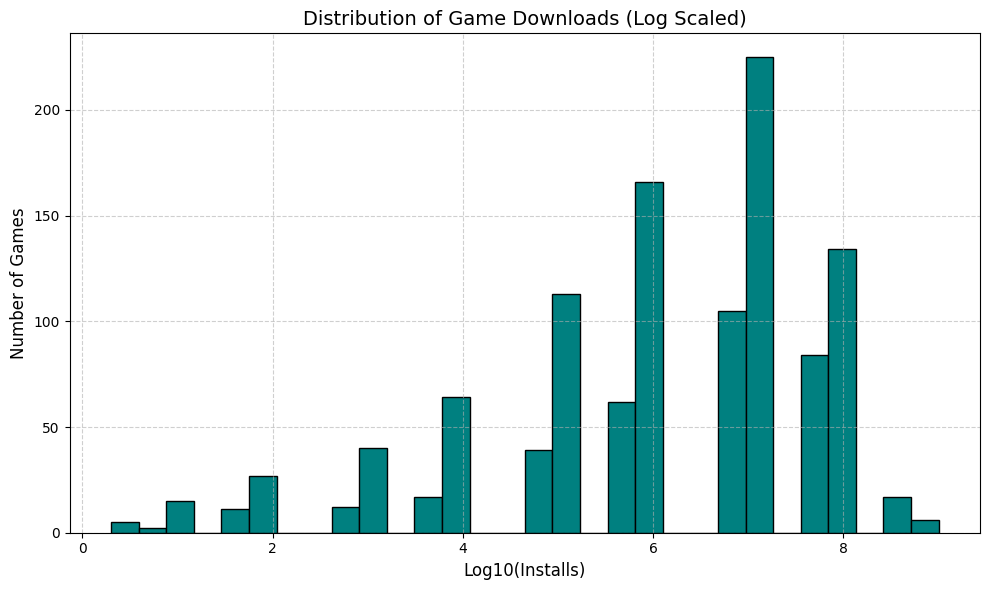

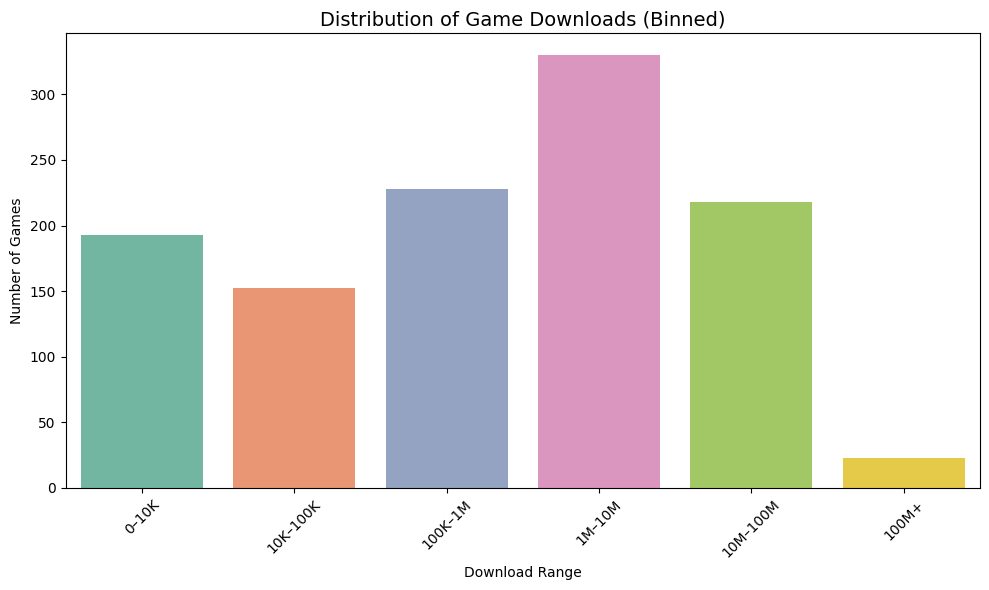

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/home/surya/Downloads/googleplaystore_games.csv')

# Clean 'Installs' column
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df['Installs'] = df['Installs'].replace('Free', np.nan)
df = df.dropna(subset=['Installs'])
df['Installs'] = df['Installs'].astype(int)

# -------- Plot 1: Histogram (Log Scale) --------
df['Log Installs'] = df['Installs'].apply(lambda x: np.log10(x + 1))

plt.figure(figsize=(10, 6))
plt.hist(df['Log Installs'], bins=30, color='teal', edgecolor='black')
plt.title('Distribution of Game Downloads (Log Scaled)', fontsize=14)
plt.xlabel('Log10(Installs)', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# -------- Plot 2: Bar Plot with Custom Colors --------
# Define bins
bins = [0, 1e4, 1e5, 1e6, 1e7, 1e8, float('inf')]
labels = ['0–10K', '10K–100K', '100K–1M', '1M–10M', '10M–100M', '100M+']
df['Install Bin'] = pd.cut(df['Installs'], bins=bins, labels=labels)

# Count per bin
install_counts = df['Install Bin'].value_counts().sort_index()

# Define custom color list
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

# Bar plot with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(x=install_counts.index, y=install_counts.values,hue=install_counts.index, palette=colors)
plt.title('Distribution of Game Downloads (Binned)', fontsize=14)
plt.xlabel('Download Range')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
